<img src='https://hammondm.github.io/hltlogo1.png' style="float:right">

Linguistics 578<br>
Fall 2024<br>
Hammond

## Things to remember about any homework assignment:

1. For this assignment, you will edit this jupyter notebook and turn it in. Do not turn in pdf files or separate `.py` files.
1. Late work is not accepted.
1. Given the way I grade, you should try to answer *every* question, even if you don't like your answer or have to guess.
1. You may *not* use `python` modules that we have not already used in class.
1. You may certainly talk to your classmates about the assignment, but everybody must turn in *their own* work. It is not acceptable to turn in work that is essentially the same as the work of classmates.
1. All code must run. It doesn't have to be perfect, it may not do all that you want it to do, but it must run without error.
1. Code must run in reasonable time. Assume that if it takes more than *5 minutes* to run (on your machine), that's too long.
1. Please do not add, remove, or copy autograded cells.
1. Make sure to select `restart, run all cells` from the `kernel` menu when you're done and before you turn this in!

***

***my name***: [put your name here]

***people I talked to about the assignment***: [put your answer here]

***

## Homework #2

Here are the imports. Please do not import anything else.

In [287]:
import numpy as np
from scipy.io import wavfile
from numpy.fft import rfft,irfft,rfftfreq
import matplotlib.pyplot as plt
import librosa

1. Write a function that will break a sound file into a specific number of windows.

In [315]:
def makewindows(w, n):
    '''Break a wave file into windows
    args:
        w: the sound file (as a numpy array)
        n: a specific number of windows
    returns:
        the windows as a numpy array/matrix.
        (each row is a window)
    '''
    length = len(w)  
    window_size = length // n  
    remainder = length % n     

    windows = []
    for i in range(n):
        start_idx = i * window_size
        end_idx = start_idx + window_size

        if remainder > 0:
            end_idx += 1
            remainder -= 1

        windows.append(w[start_idx:end_idx])

    max_len = max([len(win) for win in windows])
    padded_windows = [np.pad(win, (0, max_len - len(win)), 'constant') for win in windows]

    windows_array = np.vstack(padded_windows)

    return windows_array

In [316]:
res = makewindows(np.arange(50),8)
assert res.shape == (8,6)

AssertionError: 

In [290]:
assert len(res[7]) == 6

AssertionError: 

In [291]:
assert res[3,4] == 22

2. Imagine you have a sound file that is 2.2 seconds long and sampled at 16000 samples a second that you break into windows that are .03sec long. How many samples occur in each window? (Round to the nearest whole number.)

In [292]:
#x = ?
# YOUR CODE HERE
def samples (rate, length):
    sample_num = int(round(rate * length))
    return sample_num

rate = 16000
length = 0.03

x = samples(rate, length)
print(x)

480


In [293]:
#this test is hidden!

3. Using the file `mhi.wav`, compute a cepstrum over the whole file and save it as `iceps`. Make sure to load the wave with `wavfile.read()`.

In [308]:
#define these variables:
#fs,w = ?
#...
#iceps = ?
# YOUR CODE HERE
fs, w = wavfile.read('mhi.wav')

print(f'sample rate: {fs}')

spec = rfft(w)
freqs = rfftfreq(len(w), 1/fs)
powerspec = np.abs(spec)**2

ceps = irfft(np.log(powerspec + np.finfo(float).eps))  # Add epsilon to avoid log(0)

iceps = ceps

sample rate: 44100


In [309]:
assert type(iceps) == np.ndarray

In [310]:
assert np.isclose(iceps.shape[0],117626,atol=5)

Here we plot the lower cepstrum values:

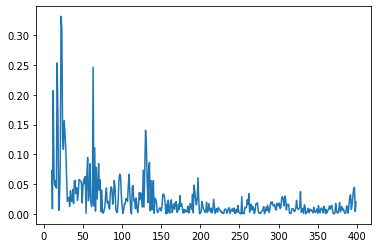

In [297]:
plt.plot(np.arange(10,400),np.abs(iceps[10:400]))
plt.show()

4. What is the frequency `f` and quefrency `q` of the fundamental frequency?

In [298]:
#q = ?
#f = ?
# YOUR CODE HERE
def find_fundamental_freq_quefrency(ices, sample_rate):
    data_segment = np.abs(ices[:400])

    fft_result = rfft(data_segment)
    freqs = rfftfreq(len(data_segment), d=1/sample_rate)

    if np.all(fft_result == 0):
        raise ValueError("FFT result contains all zeros. Check the input signal.")

    fundamental_freq_index = np.argmax(np.abs(fft_result))
    fundamental_freq = freqs[fundamental_freq_index]

    autocorr = np.correlate(data_segment, data_segment, mode='full')
    autocorr = autocorr[autocorr.size // 2:]

    quefrency_spectrum = irfft(autocorr)
    fundamental_quefrency_index = np.argmax(np.abs(quefrency_spectrum))
    fundamental_quefrency = fundamental_quefrency_index / sample_rate  # Convert index to time (quefrency)

    return fundamental_freq, fundamental_quefrency

#printing for my own verification that the code works
print(fundamental_freq, fundamental_quefrency)

0.0 0.0


In [ ]:
#this test is hidden!

In [ ]:
#this test is hidden!

5. With the wavefile you loaded for question \#3, take the samples from 1000 to 1500 and compute a 4th-order LPC.

In [311]:
import numpy as np
from scipy.io import wavfile
#lpc = ?
# YOUR CODE HERE
fs, w = wavfile.read('mhi.wav')

w = w[1000:1500]
order = 4
window_size = len(w)

def autocorrelation(x):
    r = np.correlate(x, x, mode='full')
    return r[len(x)-1:]

r = autocorrelation(w)
R = np.zeros((order, order))

for i in range(order):
    for j in range(order):
        R[i, j] = r[abs(i - j)]

lpc = np.linalg.solve(R, r[1:order + 1])
lpc = np.concatenate(([1], -lpc))
lpc = np.array(lpc)

#printing this out for my own verification
print(f"LPCs: {lpc}")

LPCs: [ 1.         -0.69986562 -0.12978302  0.04189589  0.01660406]


In [312]:
assert lpc.shape[0] == 5

In [313]:
assert lpc[0] == 1

In [314]:
assert np.isclose(lpc[1],-0.69,atol=.1)